In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
dataset = pd.read_csv("Salary_dataset.csv")
dataset.head(3)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0


In [3]:
dataset.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


<Axes: xlabel='Salary'>

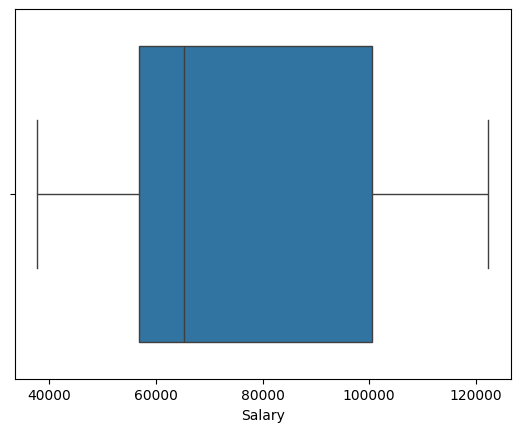

In [4]:
sns.boxplot(x="Salary", data=dataset)

In [5]:
dataset.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
x = dataset[["YearsExperience"]]
y = dataset["Salary"]

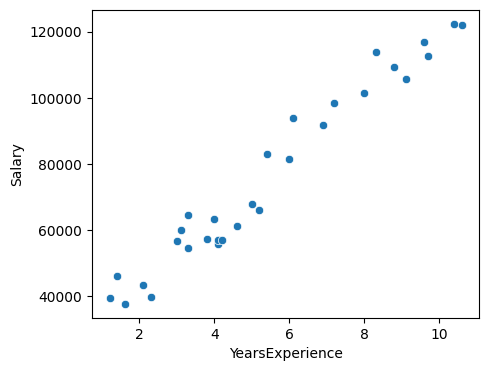

In [8]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x="YearsExperience", y="Salary", data=dataset)
plt.show()

In [9]:
def linear_regression_range(x, y, test_size=None, random_state=50):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    model = LinearRegression()
    max_rand_state = 0
    max_score = 0
    for rand_state in range(random_state-50, random_state+50):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state=rand_state)
        model.fit(x_train, y_train)
        if model.score(x_test, y_test) > max_score:
            max_rand_state = rand_state
            max_score = model.score(x_test, y_test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state=max_rand_state)
    model.fit(x_train, y_train)
    print(f"Model Accuracy: {model.score(x_test, y_test)*100:.3f}%")
    print(f"Random state set : {max_rand_state}")
    return model, x_test, y_test

In [10]:
def linear_regression(x, y, test_size=None, random_state=50):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    model = LinearRegression()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state=random_state)
    model.fit(x_train, y_train)
    print(f"Model accuracy: {model.score(x_test, y_test)*100:.3f}%")
    return model

In [11]:
lr, x_test, y_test = linear_regression_range(x, y, 0.2, 101)

Model Accuracy: 99.395%
Random state set : 103


In [12]:
lr.predict([[1.4]])

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38402.0870912])

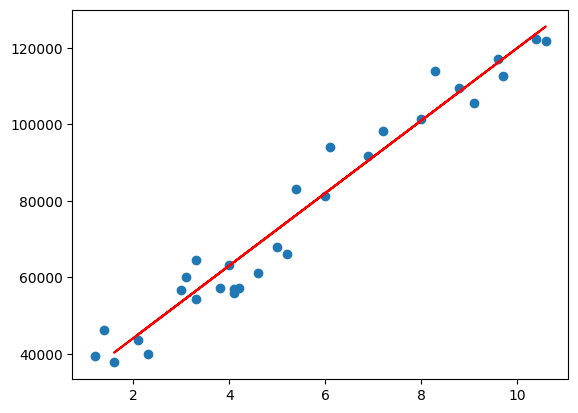

In [13]:
plt.scatter(x, y)
plt.plot(x_test, lr.predict(x_test), c='r')
plt.show()